<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S11_C1_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cargar librerías necesarias
import pandas as pd
import re #
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive # conectandonos con google drive
drive.mount('/content/drive')
import os # la libreria necesaria de la carpeta
os.chdir('/content/drive/MyDrive/Colab Notebooks/BIT_Bootcam_IA/DataSET') # es el codigo que nos permite ingresar la ruta de la carpeta para conectarme a drive

# muestra los archivos que hay en la ruta
os.listdir()

Mounted at /content/drive


['marketing_campaign.csv',
 'marketing_campaign.xlsx',
 'marketing_extract_2X_Income.xlsx',
 'linear_regression_model (1).pkl',
 'poly_regression_model (1).pkl',
 'auto-mpg.names',
 'auto-mpg.data-original',
 'auto-mpg.data',
 'Index',
 'mpg-limpios-procesados.xlsx',
 'Classification_Tests.csv',
 'heart_attack_risk_dataset.csv',
 'generated_classification_data.csv',
 'Mall_Customers.csv',
 'Police-Crime.csv',
 'amazon_reviews.csv',
 'twitter.csv']

In [ ]:
# Cargar datos
data_tw = pd.read_csv('twitter.csv')
data_ama = pd.read_csv('amazon_reviews.csv')
data = data_tw
# Mostrar primeras filas
print(data_tw.head())

# label 0 = positive
# label 1 = negative

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


El label es la funcion objetivo

* 1: positivo
* 2: negativo

# 1. Preprocessing

In [ ]:
# Función para limpiar texto
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Eliminar menciones
    text = re.sub(r'http\S+', '', text)         # Eliminar URLs
    text = re.sub(r'#', '', text)              # Eliminar hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)    # Eliminar caracteres especiales
    text = text.lower().strip()                # Convertir a minúsculas
    return text

data['clean_tweet'] = data['tweet'].apply(clean_text)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['clean_tweet'])
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train

In [ ]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenar un modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.91      0.32      0.47       456

    accuracy                           0.95      6393
   macro avg       0.93      0.66      0.72      6393
weighted avg       0.95      0.95      0.94      6393



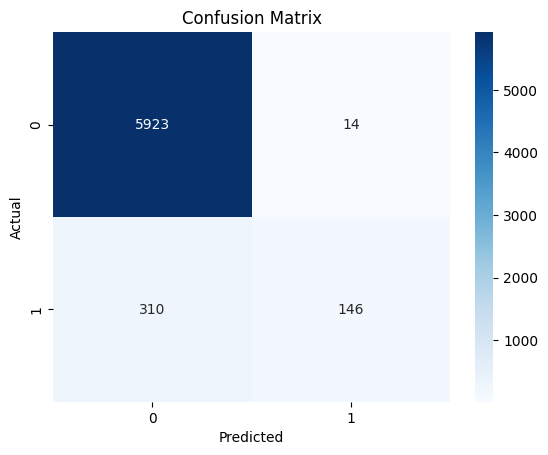

In [ ]:
# Predicciones
y_pred = model.predict(X_test)

# Métricas
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 3.Validacion

In [ ]:
new_comments = [
    "I absolutely love this! It's amazing.",  # Positivo
    "This is the worst experience I've ever had.",  # Negativo
    "Not bad, but could be better.",  # Neutral
    "I'm so excited about the new update!",  # Positivo
    "Totally disappointed with the service.",  # Negativo
    "It's okay, nothing special.",  # Neutral
    "Fantastic product! Highly recommend it.",  # Positivo
    "Terrible quality, not worth the money.",  # Negativo
    "I guess it's fine, but I wouldn't buy it again.",  # Neutral
    "Absolutely stunning! I’m impressed."  # Positivo
]

Es necesarioo aplicar a los datos de validacion el mismo proceso de preprosesamiento con el que se entrenaron los datos de train y test

In [ ]:
# Limpiar y vectorizar los nuevos comentarios
new_comments_cleaned = [clean_text(comment) for comment in new_comments]
new_comments_tfidf = vectorizer.transform(new_comments_cleaned)

# Predecir el sentimiento
new_predictions = model.predict(new_comments_tfidf)

# Mostrar resultados
for comment, prediction in zip(new_comments, new_predictions):
    sentiment = "Positive" if prediction == 0 else "Negative"
    print(f"Comment: {comment}")
    print(f"Predicted Sentiment: {sentiment}\n")


Comment: I absolutely love this! It's amazing.
Predicted Sentiment: Positive

Comment: This is the worst experience I've ever had.
Predicted Sentiment: Positive

Comment: Not bad, but could be better.
Predicted Sentiment: Positive

Comment: I'm so excited about the new update!
Predicted Sentiment: Positive

Comment: Totally disappointed with the service.
Predicted Sentiment: Positive

Comment: It's okay, nothing special.
Predicted Sentiment: Positive

Comment: Fantastic product! Highly recommend it.
Predicted Sentiment: Positive

Comment: Terrible quality, not worth the money.
Predicted Sentiment: Positive

Comment: I guess it's fine, but I wouldn't buy it again.
Predicted Sentiment: Positive

Comment: Absolutely stunning! I’m impressed.
Predicted Sentiment: Positive



In [ ]:
# Extraer las columnas relevantes
X = data['tweet']  # Texto de los tweets
y = data['label']  # Etiquetas de sentimiento

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seleccionar 10 ejemplos aleatorios del conjunto de prueba
import random

sample_indices = random.sample(range(len(X_test)), 10)
sample_comments = X_test.iloc[sample_indices].tolist()
sample_labels = y_test.iloc[sample_indices].tolist()

# Crear un DataFrame para mostrar los comentarios seleccionados y sus etiquetas
sample_data = pd.DataFrame({'Comment': sample_comments, 'Label': sample_labels})
sample_data

,Comment,Label
0,#80 #thousand #care # workers in the #iuk are ...,0
1,just another day in paradise #dejournettgrea...,0
2,@user for the history to come! happy for#cl...,0
3,ocean commotion! #vbs2016 @user,0
4,@user @user gotta love @user what a giant slob...,0
5,playing hoverboard ðð #playing #play #ho...,0
6,if u truly want #happiness u must go where p...,0
7,ð #love #instagood #photooftheday top.tags ...,0
8,had a nice and constructive phone call today t...,0
9,#tbt when #drbanner gets .. from #marvelsthea...,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5937
           1       0.63      0.59      0.61       456

    accuracy                           0.95      6393
   macro avg       0.80      0.78      0.79      6393
weighted avg       0.94      0.95      0.95      6393



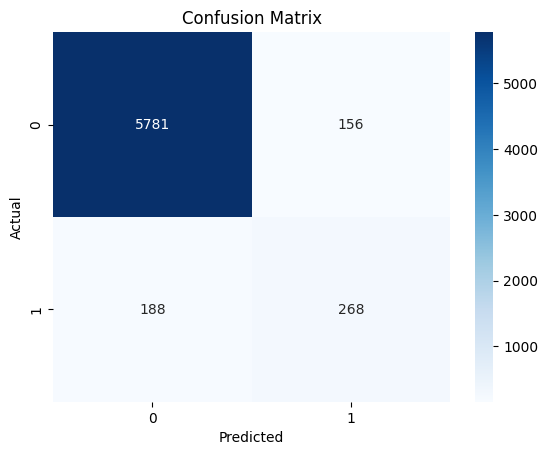

Comment: I absolutely love this! It's amazing.
Predicted Sentiment: Positive

Comment: This is the worst experience I've ever had.
Predicted Sentiment: Positive

Comment: Not bad, but could be better.
Predicted Sentiment: Positive

Comment: I'm so excited about the new update!
Predicted Sentiment: Positive

Comment: Totally disappointed with the service.
Predicted Sentiment: Positive

Comment: It's okay, nothing special.
Predicted Sentiment: Positive

Comment: Fantastic product! Highly recommend it.
Predicted Sentiment: Positive

Comment: Terrible quality, not worth the money.
Predicted Sentiment: Positive

Comment: I guess it's fine, but I wouldn't buy it again.
Predicted Sentiment: Positive

Comment: Absolutely stunning! I’m impressed.
Predicted Sentiment: Positive



In [ ]:
params = {
  'criterion': ['gini', 'entropy'],
  'max_depth': [None, 3, 10, 30],
  'min_samples_split': [2, 10, 25]}

# Vectorizar usando TF-IDF

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['clean_tweet'])
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = DecisionTreeClassifier()
#model= DecisionTreeClassifier(class_weight=class_weights_dict)
# hay que agregar class_weights_dict si los pesos estan desbalanceados
validator = GridSearchCV(modelo, params, cv=5)
validator.fit(X_train, y_train)
model = DecisionTreeClassifier(**validator.best_params_)

y_pred = model.predict(X_test)

# Métricas
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

new_comments_cleaned = [clean_text(comment) for comment in new_comments]
new_comments_tfidf = vectorizer.transform(new_comments_cleaned)

# Predecir el sentimiento
new_predictions = model.predict(new_comments_tfidf)

# Mostrar resultados
for comment, prediction in zip(new_comments, new_predictions):
    sentiment = "Positive" if prediction == 0 else "Negative"
    print(f"Comment: {comment}")
    print(f"Predicted Sentiment: {sentiment}\n")


In [ ]:
params = {
  'criterion': ['gini', 'entropy'],
  'max_depth': [None, 3, 10, 30],
  'min_samples_split': [2, 10, 25]}

# Vectorizar usando TF-IDF

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['clean_tweet'])
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = DecisionTreeClassifier()
#model= DecisionTreeClassifier(class_weight=class_weights_dict)
# hay que agregar class_weights_dict si los pesos estan desbalanceados
validator = GridSearchCV(modelo, params, cv=5)
validator.fit(X_train, y_train)
model = DecisionTreeClassifier(**validator.best_params_)

y_pred = model.predict(X_test)

# Métricas
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

new_comments_cleaned = [clean_text(comment) for comment in new_comments]
new_comments_tfidf = vectorizer.transform(new_comments_cleaned)

# Predecir el sentimiento
new_predictions = model.predict(new_comments_tfidf)

# Mostrar resultados
for comment, prediction in zip(new_comments, new_predictions):
    sentiment = "Positive" if prediction == 0 else "Negative"
    print(f"Comment: {comment}")
    print(f"Predicted Sentiment: {sentiment}\n")


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5937
           1       0.81      0.34      0.48       456

    accuracy                           0.95      6393
   macro avg       0.88      0.67      0.72      6393
weighted avg       0.94      0.95      0.94      6393



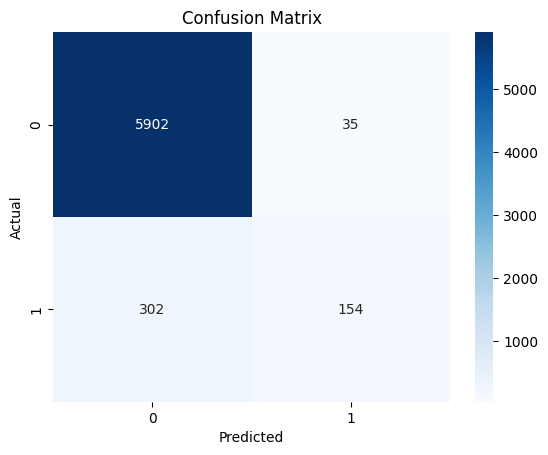

Comment: I absolutely love this! It's amazing.
Predicted Sentiment: Positive

Comment: This is the worst experience I've ever had.
Predicted Sentiment: Positive

Comment: Not bad, but could be better.
Predicted Sentiment: Positive

Comment: I'm so excited about the new update!
Predicted Sentiment: Positive

Comment: Totally disappointed with the service.
Predicted Sentiment: Positive

Comment: It's okay, nothing special.
Predicted Sentiment: Positive

Comment: Fantastic product! Highly recommend it.
Predicted Sentiment: Positive

Comment: Terrible quality, not worth the money.
Predicted Sentiment: Positive

Comment: I guess it's fine, but I wouldn't buy it again.
Predicted Sentiment: Positive

Comment: Absolutely stunning! I’m impressed.
Predicted Sentiment: Positive



In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [1, 3, 8],
    'max_depth': [None, 5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.5]
}
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['clean_tweet'])
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo= XGBClassifier()
validator = GridSearchCV(estimator=modelo, param_grid=params, cv=5, scoring='accuracy')
validator.fit(X_train, y_train)
model = validator.best_estimator_

y_pred = model.predict(X_test)

# Métricas
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

new_comments_cleaned = [clean_text(comment) for comment in new_comments]
new_comments_tfidf = vectorizer.transform(new_comments_cleaned)

# Predecir el sentimiento
new_predictions = model.predict(new_comments_tfidf)

# Mostrar resultados
for comment, prediction in zip(new_comments, new_predictions):
    sentiment = "Positive" if prediction == 0 else "Negative"
    print(f"Comment: {comment}")
    print(f"Predicted Sentiment: {sentiment}\n")

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5937
           1       0.83      0.50      0.63       456

    accuracy                           0.96      6393
   macro avg       0.90      0.75      0.80      6393
weighted avg       0.95      0.96      0.95      6393



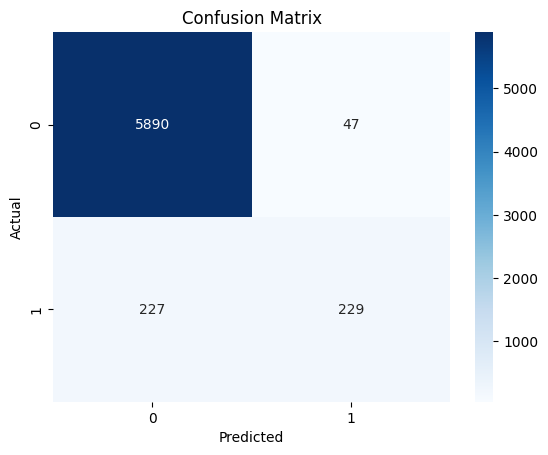

Comment: I absolutely love this! It's amazing.
Predicted Sentiment: Positive

Comment: This is the worst experience I've ever had.
Predicted Sentiment: Positive

Comment: Not bad, but could be better.
Predicted Sentiment: Positive

Comment: I'm so excited about the new update!
Predicted Sentiment: Positive

Comment: Totally disappointed with the service.
Predicted Sentiment: Positive

Comment: It's okay, nothing special.
Predicted Sentiment: Positive

Comment: Fantastic product! Highly recommend it.
Predicted Sentiment: Positive

Comment: Terrible quality, not worth the money.
Predicted Sentiment: Positive

Comment: I guess it's fine, but I wouldn't buy it again.
Predicted Sentiment: Positive

Comment: Absolutely stunning! I’m impressed.
Predicted Sentiment: Positive



In [ ]:
params = {
    'n_estimators': [5, 10, 15],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10
                          ]}
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['clean_tweet'])
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo= RandomForestClassifier()
validator = GridSearchCV(estimator=modelo, param_grid=params, cv=5, scoring='accuracy')
validator.fit(X_train, y_train)
model = validator.best_estimator_

y_pred = model.predict(X_test)

# Métricas
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

new_comments_cleaned = [clean_text(comment) for comment in new_comments]
new_comments_tfidf = vectorizer.transform(new_comments_cleaned)

# Predecir el sentimiento
new_predictions = model.predict(new_comments_tfidf)

# Mostrar resultados
for comment, prediction in zip(new_comments, new_predictions):
    sentiment = "Positive" if prediction == 0 else "Negative"
    print(f"Comment: {comment}")
    print(f"Predicted Sentiment: {sentiment}\n")